# NetworkX

### Name: Fangsheng Wu

### 1. Ideas of NetworkX

#### 1.1 What is NetworkX?
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

#### 1.2 What does NetworkX provide?
- tools for the study of the structure and dynamics of social, biological, and infrastructure networks;
- a standard programming interface and graph implementation that is suitable for many applications;
- a rapid development environment for collaborative, multidisciplinary projects;
- an interface to existing numerical algorithms and code written in C, C++, and FORTRAN; 
- and the ability to painlessly work with large nonstandard data sets.

#### 1.3 What can we do with NetworkX?
With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

### 2. Begin to work with NetworkX
#### 2.1 Initialize a Graph instance

In [29]:
import networkx as nx
G0 = nx.Graph()
G1 = nx.DiGraph()
G2 = nx.MultiGraph() 
G3 = nx.MultiDiGraph()

The following basic graph types are provided as classes:

`Graph`:
This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`: 
Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`: 
A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`: 
A directed version of a MultiGraph.

#### 2.2 Graph creation

NetworkX graph objects can be created in one of three ways:
- Graph generators—standard algorithms to create network topologies.
- Importing data from pre-existing (usually file) sources.
- Adding edges and nodes explicitly.

In [30]:
# explicitly add weighted or un-weighted edges
G0.add_edge(1, 2) 
G0.add_edge(2, 3, weight=0.9)

# any hashable can be a node
import math
G0.add_edge('y', 'x', function=math.cos)
G0.add_node(math.cos)  

# add many edges at a time
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G1.add_edges_from(elist)
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G1.add_weighted_edges_from(elist)

#### 2.3 Graph reporting
Class views provide basic reporting of nodes, neighbors, edges and degree. These views provide iteration over the properties as well as membership queries and data attribute lookup. The views refer to the graph data structure so changes to the graph are reflected in the views. This is analogous to dictionary views in Python 3. If you want to change the graph while iterating you will need to use e.g. `for e in list(G.edges):`. The views provide set-like operations, e.g. union and intersection, as well as dict-like lookup and iteration of the data attributes using `G.edges[u, v]['color']` and for e, datadict in `G.edges.items():`. Methods `G.edges.items()` and `G.edges.values()` are familiar from python dicts. In addition `G.edges.data()` provides specific attribute iteration e.g. `for e, e_color in G.edges.data('color'):`.

The basic graph relationship of an edge can be obtained in two ways. One can look for neighbors of a node or one can look for edges. We jokingly refer to people who focus on nodes/neighbors as node-centric and people who focus on edges as edge-centric. The designers of NetworkX tend to be node-centric and view edges as a relationship between nodes. You can see this by our choice of lookup notation like `G[u]` providing neighbors (adjacency) while edge lookup is `G.edges[u, v]`. Most data structures for sparse graphs are essentially adjacency lists and so fit this perspective. In the end, of course, it doesn’t really matter which way you examine the graph. `G.edges` removes duplicate representations of undirected edges while neighbor reporting across all nodes will naturally report both directions.

Any properties that are more complicated than edges, neighbors and degree are provided by functions. For example `nx.triangles(G, n)` gives the number of triangles which include node n as a vertex. These functions are grouped in the code and documentation under the term algorithms.

In [31]:
for e in list(G0.edges):
    print(e)
print(G0.edges.items())

(1, 2)
(2, 3)
('y', 'x')
ItemsView(EdgeView([(1, 2), (2, 3), ('y', 'x')]))


#### 2.4 Graphic algorithms
A number of graph algorithms are provided with NetworkX. These include shortest path, and breadth first search, clustering and isomorphism algorithms and others. For instance, to search for the shortest path between nodes, we can use the included Dijkstra’s algorithm.

In [32]:
e = [('a', 'b', 0.3), ('a', 'b', 0.5), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G2.add_weighted_edges_from(e)
print(nx.dijkstra_path(G2, 'a', 'd'))

['a', 'c', 'd']


#### 2.5 Graph visualization
While NetworkX is not designed as a network drawing tool, it provides a simple interface to drawing packages and some simple layout algorithms. It interfaces to the excellent Graphviz layout tools like dot and neato with the (suggested) pygraphviz package or the pydot interface. Drawing can be done using external programs or the Matplotlib Python package. Interactive GUI interfaces are possible, though not provided. The drawing tools are provided in the module drawing.

The basic drawing functions essentially place the nodes on a scatterplot using the positions you provide via a dictionary or the positions are computed with a layout function. The edges are lines between those dots.

Basic configurable parameters of graph plotting function include:
- `pos` (dictionary, optional) – A dictionary with nodes as keys and positions as values. If not specified a spring layout positioning will be computed. See networkx.drawing.layout for functions that compute node positions.
- `arrows` (bool, optional (default=True)) – For directed graphs, if True draw arrowheads. Note: Arrows will be the same color as edges.
- `with_labels` (bool, optional (default=True)) – Set to True to draw labels on the nodes.
- `node_size` (scalar or array, optional (default=300)) – Size of nodes. If an array is specified it must be the same length as nodelist.
- `node_color` (color or array of colors (default=’#1f78b4’)) – Node color. Can be a single color or a sequence of colors with the same length as nodelist. Color can be string, or rgb (or rgba) tuple of floats from 0-1. If numeric values are specified they will be mapped to colors using the cmap and vmin,vmax parameters. See matplotlib.scatter for more details.
- `width` (float, optional (default=1.0)) – Line width of edges
- `edge_color` (color or array of colors (default=’k’)) – Edge color. Can be a single color or a sequence of colors with the same length as edgelist. Color can be string, or rgb (or rgba) tuple of floats from 0-1. If numeric values are specified they will be mapped to colors using the edge_cmap and edge_vmin,edge_vmax parameters.
- `style` (string, optional (default=’solid’)) – Edge line style (solid|dashed|dotted,dashdot)
- `font_size` (int, optional (default=12)) – Font size for text labels
- `font_color` (string, optional (default=’k’ black)) – Font color string

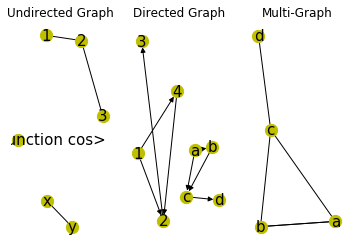

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
# G = nx.cubical_graph()
plt.subplot(131)
plt.title('Undirected Graph')
nx.draw(G0, pos=nx.spring_layout(G0, k=1.5), with_labels=True, node_size=150, node_color='y', font_size=15)

plt.subplot(132)
plt.title('Directed Graph')
nx.draw(G1, pos=nx.spring_layout(G1, k=1.5), with_labels=True, node_size=150, node_color='y', font_size=15)

plt.subplot(133)
plt.title('Multi-Graph')
nx.draw(G2, pos=nx.spring_layout(G2, k=1.5), with_labels=True, node_size=150, node_color='y', font_size=15)

#### 2.6 Data Structure
NetworkX uses a “dictionary of dictionaries of dictionaries” as the basic network data structure. This allows fast lookup with reasonable storage for large sparse networks. The keys are nodes so `G[u]` returns an adjacency dictionary keyed by neighbor to the edge attribute dictionary. A view of the adjacency data structure is provided by the dict-like object `G.adj` as e.g. for node, nbrsdict in `G.adj.items()`:. The expression `G[u][v]` returns the edge attribute dictionary itself. A dictionary of lists would have also been possible, but not allow fast edge detection nor convenient storage of edge data.

Advantages of dict-of-dicts-of-dicts data structure:

- Find edges and remove edges with two dictionary look-ups.

- Prefer to “lists” because of fast lookup with sparse storage.

- Prefer to “sets” since data can be attached to edge.

- `G[u][v]` returns the edge attribute dictionary.

- `n in G` tests if node n is in graph `G`.

- `for n in G:` iterates through the graph.

- `for nbr in G[n]:` iterates through neighbors.

As an example, here is the representation of undirected graph `G0`.

In [65]:
G0.adj

AdjacencyView({1: {2: {}}, 2: {1: {}, 3: {'weight': 0.9}}, 3: {2: {'weight': 0.9}}, 'y': {'x': {'function': <built-in function cos>}}, 'x': {'y': {'function': <built-in function cos>}}, <built-in function cos>: {}})

The data structure gets morphed slightly for each base graph class. For DiGraph two dict-of-dicts-of-dicts structures are provided, one for successors (`G.succ`) and one for predecessors (`G.pred`). For MultiGraph/MultiDiGraph we use a dict-of-dicts-of-dicts-of-dicts 1 where the third dictionary is keyed by an edge key identifier to the fourth dictionary which contains the edge attributes for that edge between the two nodes.

Graphs provide two interfaces to the edge data attributes: adjacency and edges. So `G[u][v]['width']` is the same as `G.edges[u, v]['width']`.

In [70]:
G0.add_edge('x', 'y', color='red', weight=0.5, size=100)
print(G0['x']['y']['size'], G0.edges['x','y']['color'])

100 red


### 3. Case study with NetworkX
In order to bring a more profound insight of this versetile package, I hereby introduced an implement example that I have practically went through during my research on social media datasets. I have collected Twitter data of users in a certain area during a certain time period. Visualization of such data is needed for further study on the connection structures of Twitter users and its change after social impacts. The data structure of tweet data almost resambles the Twitter data Professor provided us in homework2, but maintain rawer(contains more attributes for each of the objects). Thus a more detailed preprocessing should be conducted first.
#### 3.1 Retrieve preprocessed data

In [99]:
import csv
import matplotlib
import collections

location = 'Addicks'
category = 'other_relevant_information'
f_dir = 'data/' + category + '.csv'
sim = []
ids = []
with open(f_dir) as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        sim.append([row[1], row[3], row[-1]])
        if row[1] not in ids:
            ids.append(row[1])

#### 3.2  Initialize graph object and add nodes & edges

In [100]:
G = nx.Graph()
for _id in ids:
    G.add_node(_id)
    for _id in ids:
        for row in sim:
            if row[0] == _id and float(row[2]) >= 0.5:
                G.add_edge(_id, row[1])

#### 3.3  Record clusters

In [101]:
# cluster recording
clusters = []
for edge in G.edges():
    if len(clusters) == 0:
        clusters.append([edge[0], edge[1]])
    else:
        flag = 0
        for cluster in clusters:
            if flag == 0:
                if edge[0] in cluster and edge[1] not in cluster:
                    cluster.append(edge[1])
                    flag = 1
                elif edge[1] in cluster and edge[0] not in cluster:
                    cluster.append(edge[0])
                    flag = 1
                elif edge[1] in cluster and edge[0] in cluster:
                    flag = 1
        if flag == 0:
            clusters.append([edge[0], edge[1]])
# all_clusters[location + '__' + category] = clusters

#### 3.4 Shaping the output

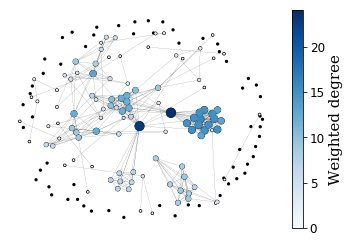

In [106]:
# shaping the network
max_degree = max([degree[1] for degree in G.degree()])
y = 0
x = math.log(80, max_degree)
# if max_degree <= 1:
# 	y = 40 - 1
# else:
# 	x = math.log(80, max_degree)

pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, 
						nodelist = ids, 
						node_size = [G.degree[node] ** x + y * G.degree[node] + 5 for node in ids], 
						node_color = 'black')
node = nx.draw_networkx_nodes(G, pos, 
						nodelist = ids, 
						node_size = [G.degree[node] ** x + y * G.degree[node] for node in ids], 
						node_color = [G.degree[node] for node in ids],
						cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color = 'black', width = 0.1)
font_name = 'serif'
font = matplotlib.font_manager.FontProperties(family= font_name, style='normal', size=15)
colorbar = plt.colorbar(node, label='Weighted degree')
colorbar.ax.yaxis.label.set_font_properties(font)
colorbar.ax.tick_params(labelsize=12)
plt.axis("off")
plt.show()